In [19]:
from frc3223_azurite.data import read_csv
import numpy
from matplotlib import pyplot as plt
import pathfinder as pf

In [33]:
points = [
        pf.Waypoint(0, 0, numpy.radians(90)),
        pf.Waypoint(-2, 2, 0),
        pf.Waypoint(-8, 10, numpy.radians(90)),
    ]

info, trajectory = pf.generate(points, pf.FIT_HERMITE_CUBIC, pf.SAMPLES_HIGH,
                                   dt=0.05, # 50ms
                                   max_velocity=1.7,
                                   max_acceleration=2.0,
                                   max_jerk=60.0)
# Wheelbase Width = 0.5m
modifier = pf.modifiers.TankModifier(trajectory).modify(0.5)

# Do something with the new Trajectories...
left = modifier.getLeftTrajectory()
right = modifier.getRightTrajectory()

pf.serialize_csv("left.csv", left)
pf.serialize_csv("right.csv", right)

lefty = read_csv("left.csv")
righty = read_csv('right.csv')

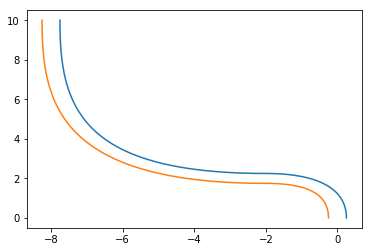

In [34]:
plt.plot(righty['x'], righty['y'])
plt.plot(lefty['x'], lefty['y'])
plt.show()